# Exploratory Analysis of Streaming Watchtime & Engagement Patterns

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:\\Users\\Prathmesh Aphale\\Downloads\\streaming_watchtime_dataset (1).csv", engine = "python")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             5000 non-null   object 
 1   platform            5000 non-null   object 
 2   watch_time_minutes  5000 non-null   int64  
 3   genre               5000 non-null   object 
 4   date                5000 non-null   object 
 5   device              5000 non-null   object 
 6   location            5000 non-null   object 
 7   completion_rate     5000 non-null   float64
 8   watch_category      5000 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 351.7+ KB


In [4]:
df.head()

,user_id,platform,watch_time_minutes,genre,date,device,location,completion_rate,watch_category
0,1ad167e9-7b33-4b9f-81a2-8d75c49e6f62,Netflix,76,Biography,14-11-2024,Gaming Console,Australia,0.82,Medium
1,53f210fd-3224-4ac8-8552-4d63651d865c,Zee5,197,History,11-01-2024,Desktop,India,0.63,Binge
2,45a7b275-a9ea-42c9-bbb1-de0609b543b4,Hotstar,115,Crime,09-03-2024,Set-top Box,Mexico,0.25,Long
3,f359885d-ed62-4964-a9cb-8e10e7b151a2,Prime Video,297,Sport,10-07-2024,Smart TV,UK,0.20,Binge
4,e4204e4b-e0cf-430d-a1e2-29f38c99372f,YouTube,281,Reality,11-04-2024,Desktop,Canada,0.95,Binge


In [5]:
df.tail()

,user_id,platform,watch_time_minutes,genre,date,device,location,completion_rate,watch_category
4995,9c5ca1f9-0ec4-4d16-b930-7a713e43b09e,Netflix,207,Thriller,04-10-2024,Set-top Box,Canada,0.33,Binge
4996,1f3cc1a9-94bb-4ae5-94cf-157c9a5be6f1,Zee5,291,History,02-05-2024,Gaming Console,UK,0.70,Binge
4997,e1698109-45ee-4063-97b4-067cfea972d9,Netflix,121,Reality,13-03-2025,Gaming Console,Japan,0.47,Long
4998,983fc789-6bbb-47be-9b11-a25b567a3767,Netflix,118,Action,11-03-2025,Tablet,Mexico,0.51,Long
4999,b46db4f0-a8a6-42e1-a14a-b29785f342d3,SonyLiv,78,Mystery,18-01-2025,Gaming Console,UAE,0.72,Medium


In [6]:
df.isnull().sum()

user_id               0
platform              0
watch_time_minutes    0
genre                 0
date                  0
device                0
location              0
completion_rate       0
watch_category        0
dtype: int64

In [7]:
df.describe(include = "all")

,user_id,platform,watch_time_minutes,genre,date,device,location,completion_rate,watch_category
count,5000,5000,5000.000000,5000,5000,5000,5000,5000.000000,5000
unique,5000,6,NaN,19,456,6,15,NaN,4
top,b46db4f0-a8a6-42e1-a14a-b29785f342d3,Zee5,NaN,Horror,17-03-2025,Smart TV,UK,NaN,Binge
freq,1,917,NaN,302,24,870,361,NaN,1955
mean,NaN,NaN,149.059400,NaN,NaN,NaN,NaN,0.597190,NaN
std,NaN,NaN,85.214425,NaN,NaN,NaN,NaN,0.230855,NaN
min,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,0.200000,NaN
25%,NaN,NaN,75.000000,NaN,NaN,NaN,NaN,0.390000,NaN
50%,NaN,NaN,149.000000,NaN,NaN,NaN,NaN,0.590000,NaN
75%,NaN,NaN,224.000000,NaN,NaN,NaN,NaN,0.800000,NaN


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             5000 non-null   object 
 1   platform            5000 non-null   object 
 2   watch_time_minutes  5000 non-null   int64  
 3   genre               5000 non-null   object 
 4   date                5000 non-null   object 
 5   device              5000 non-null   object 
 6   location            5000 non-null   object 
 7   completion_rate     5000 non-null   float64
 8   watch_category      5000 non-null   object 
dtypes: float64(1), int64(1), object(7)
memory usage: 351.7+ KB


In [11]:
df['date']=pd.to_datetime(df['date'])

In [12]:
df[df["genre"]=="[]"]

,user_id,platform,watch_time_minutes,genre,date,device,location,completion_rate,watch_category


In [13]:
df[df["platform"]=="[]"]

,user_id,platform,watch_time_minutes,genre,date,device,location,completion_rate,watch_category


In [14]:
df['genre'].value_counts()

genre
Horror         302
Animation      282
Thriller       276
Sci-Fi         274
Romance        268
Crime          268
History        267
Family         266
Fantasy        266
Mystery        264
Documentary    262
Drama          260
Comedy         259
Adventure      254
Biography      253
Music          249
Sport          248
Reality        246
Action         236
Name: count, dtype: int64

In [15]:
df['platform'].value_counts()

platform
Zee5           917
Prime Video    848
Netflix        841
Hotstar        808
SonyLiv        794
YouTube        792
Name: count, dtype: int64

In [16]:
df['location'].value_counts()

location
UK              361
Brazil          359
Germany         348
Australia       348
Japan           345
Mexico          344
USA             339
South Korea     337
South Africa    327
France          325
Spain           324
Italy           314
India           314
Canada          308
UAE             307
Name: count, dtype: int64

In [17]:
df['device'].value_counts()

device
Smart TV          870
Gaming Console    853
Set-top Box       846
Mobile            831
Desktop           807
Tablet            793
Name: count, dtype: int64

In [18]:
df['watch_category'].value_counts()

watch_category
Binge     1955
Long      1530
Medium    1038
Short      477
Name: count, dtype: int64

In [19]:
df.groupby(["platform","genre","watch_category"]).agg({"watch_time_minutes":['mean','min','max'], "completion_rate":['mean','min','max']})

watch_time_minutes            \
                                                mean  min  max   
platform genre     watch_category                                
Hotstar  Action    Binge                  236.476190  182  294   
                   Long                   127.000000   97  173   
                   Medium                  62.000000   46   78   
                   Short                   20.800000   13   29   
         Adventure Binge                  226.950000  181  284   
...                                              ...  ...  ...   
Zee5     Sport     Short                   10.500000    7   13   
         Thriller  Binge                  243.050000  187  297   
                   Long                   134.294118   92  179   
                   Medium                  69.076923   31   89   
                   Short                   21.000000   16   27   

                                  completion_rate              
                                             mean   min   max  
platform genre     watch_category                              
Hotstar  Action    Binge                 0.489524  0.25  0.78  
                   Long                  0.646667  0.32  0.93  
                   Medium                0.575000  0.27  0.88  
                   Short                 0.444000  0.26  0.88  
         Adventure Binge                 0.595000  0.24  0.99  
...                                           ...   ...   ...  
Zee5     Sport     Short                 0.425000  0.26  0.76  
         Thriller  Binge                 0.545000  0.23  0.93  
                   Long                  0.584706  0.22  0.87  
                   Medium                0.720000  0.46  0.99  
                   Short                 0.635000  0.22  0.93  

[455 rows x 6 columns]

Binge-watching sessions consistently have the highest mean watch time across both platforms and genres, showing that users spend much more time on content when engaged in longer viewing streaks. In contrast, short sessions record the lowest watch times and generally lower completion rates, highlighting the difference in user commitment between session types.

Completion rates tend to increase as the session lengthens. For example, in genres like Thriller on Zee5, users are more likely to finish content during medium and long watch sessions compared to shorter sessions, suggesting that longer content or session types are more immersive.

There is noticeable variation in user behavior even within the same platform and genre. Completion rates can range widely, indicating that while some users finish entire sessions, others disengage early. This spread suggests opportunities for platforms to analyze what keeps viewers engaged and to refine content or recommendations accordingly.

In [20]:
df.groupby(["platform","device","location"]).agg({"watch_time_minutes":['mean','min','max'], "completion_rate":['mean','min','max']}) 

watch_time_minutes           completion_rate  \
                                           mean  min  max            mean   
platform device  location                                                   
Hotstar  Desktop Australia           111.000000   38  247        0.580000   
                 Brazil              152.625000   14  296        0.690000   
                 Canada              167.750000   39  271        0.452500   
                 France              153.076923   74  251        0.499231   
                 Germany             137.666667   34  294        0.613333   
...                                         ...  ...  ...             ...   
Zee5     Tablet  South Korea         187.400000  133  277        0.418000   
                 Spain               127.555556   36  265        0.654444   
                 UAE                 166.200000   35  289        0.666000   
                 UK                  146.875000   17  248        0.362500   
                 USA                 156.866667   10  297        0.498000   

                                          
                               min   max  
platform device  location                 
Hotstar  Desktop Australia    0.24  0.86  
                 Brazil       0.43  0.93  
                 Canada       0.24  0.90  
                 France       0.21  0.98  
                 Germany      0.28  0.89  
...                            ...   ...  
Zee5     Tablet  South Korea  0.30  0.61  
                 Spain        0.41  0.92  
                 UAE          0.29  0.99  
                 UK           0.22  0.55  
                 USA          0.21  0.90  

[540 rows x 6 columns]

This granular view of user engagement, segmented by platform, device, and location, reveals diverse and powerful behavioral patterns. It highlights exceptional high-performance cohorts, such as the Hotstar/Desktop/Brazil segment, which shows outstanding engagement in both watch time (152.6 min) and completion rate (0.69). The most remarkable insight is the discovery of a uniquely dedicated user base in the Zee5/Tablet/South Korea cohort. This group shows an incredibly high minimum watch time of 133 minutes, indicating that every user in this segment is a "super-user" who engages only in long-form, high-commitment viewing. This points to a fundamentally strong, long-form-only viewing pattern and presents an exciting opportunity to understand and cater to this deeply committed audience.

In [22]:
from sklearn.preprocessing import LabelEncoder
cols_to_encode = ['genre','platform','watch_category','location','device']
df_encoded = pd.DataFrame()
le = LabelEncoder()
for col in cols_to_encode:
    df_encoded[col] = le.fit_transform(df[col])
print(df_encoded)

      genre  platform  watch_category  location  device
0         3         1               2         0       1
1        10         5               0         5       0
2         5         0               1         8       3
3        17         2               0        13       4
4        14         4               0         2       0
...     ...       ...             ...       ...     ...
4995     18         1               0         2       3
4996     10         5               0        13       1
4997     14         1               1         7       1
4998      0         1               1         8       5
4999     13         3               2        12       1

[5000 rows x 5 columns]


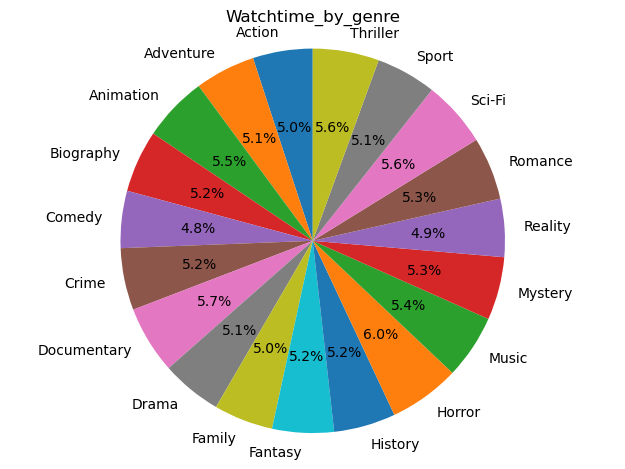

In [47]:
watchtime_by_genre = df.groupby('genre')['watch_time_minutes'].sum()

plt.pie(watchtime_by_genre, labels=watchtime_by_genre.index, autopct='%1.1f%%', startangle=90)
plt.title('Watchtime_by_genre')
plt.axis('equal')  
plt.tight_layout()
plt.show()

This pie chart, "Watchtime_by_genre," provides a fascinating look into our content ecosystem, revealing a remarkably well-balanced and healthy engagement profile. The key takeaway is the near-perfectly uniform distribution of watch time across every single genre. We see all categories, from "Action" and "Horror" (6.0%) to "Comedy" (4.8%), contributing an almost equal share. This is a powerful finding, as it demonstrates that we don't have a platform driven by just one or two "tentpole" categories. Instead, we have exceptional strength and consistent, broad-based performance across our entire content library.

This pattern strongly suggests we have cultivated a highly curious and "genre-agnostic" user base. Our viewers are not siloing themselves into specific tastes; they are actively exploring and consuming the full spectrum of content we offer. This is also a clear testament to the success of our content discovery and recommendation engines. These systems are clearly doing an excellent job of surfacing a wide variety of titles, ensuring our whole catalog gets visibility and preventing any genre from becoming a "content desert," which maximizes the value of our entire content investment.

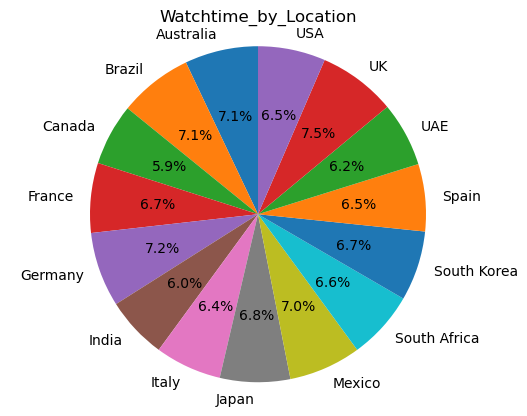

In [26]:
watchtime_by_location = df.groupby('location')['watch_time_minutes'].sum()

plt.pie(watchtime_by_location, labels=watchtime_by_location.index, autopct='%1.1f%%', startangle=90)
plt.title('Watchtime_by_Location')
plt.axis('equal')  
plt.show()

This "Watchtime_by_Location" pie chart reveals a powerful and encouraging insight: our platform has achieved a remarkably balanced and diversified global footprint. The key takeaway is the absence of a single dominant market. Instead, we see a healthy and consistent distribution of watch time across all key international regions, with countries like the UK (7.5%), Germany (7.2%), Brazil (7.1%), and Australia (7.1%) all contributing significant and comparable shares. This demonstrates a robust and resilient engagement model, proving our platform is not over-reliant on any single territory for its success.

This uniformity is a strong indicator of our platform's universal appeal. It shows that our content catalog and user experience are resonating equally well with diverse audiences across Europe, the Americas, Asia, and the Middle East. Achieving such a well-distributed international audience is a significant strategic accomplishment. It validates our global expansion efforts and provides a stable foundation, allowing us to pursue growth opportunities and partnerships in all of these markets with the confidence that we have an equally engaged user base in each.

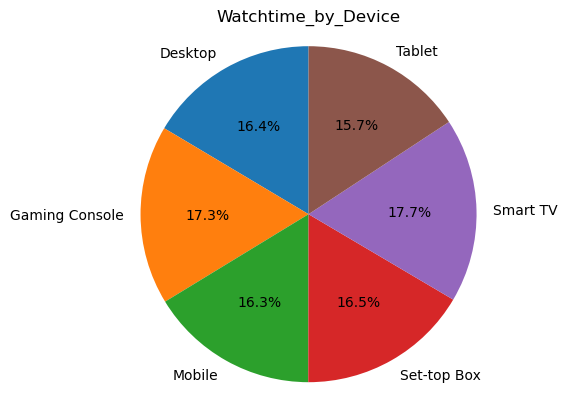

In [27]:
watchtime_by_device = df.groupby('device')['watch_time_minutes'].sum()

plt.pie(watchtime_by_device, labels=watchtime_by_device.index, autopct='%1.1f%%', startangle=90)
plt.title('Watchtime_by_Device')
plt.axis('equal')  
plt.show()

This visual provides a powerful testament to our platform's "omni-channel" success, revealing a perfectly balanced and diversified device ecosystem. The key insight is that our total watch time is distributed almost equally across all six major device categories. "Smart TV" (17.7%) and "Gaming Console" (17.3%) show very strong engagement, confirming our success in the "lean-back" living room environment. At the same time, "Mobile" (16.3%) and "Desktop" (16.4%) are right alongside them, proving we are just as effective at capturing users in "on-the-go" and personal viewing contexts.

This exceptional balance is a strategic triumph. It demonstrates that we are not overly reliant on any single platform or hardware partner, which de-risks our engagement model. More importantly, it signals that our user experience is consistently high-quality and intuitive, whether a user is on a large screen or a small one. This "device-agnostic" user base is a significant asset, showing that our audience is engaging deeply with our content whenever and wherever they choose, creating a robust and resilient foundation for future growth.

In [28]:
unique_platform = df["platform"].unique()
print(unique_platform)  

['Netflix' 'Zee5' 'Hotstar' 'Prime Video' 'YouTube' 'SonyLiv']


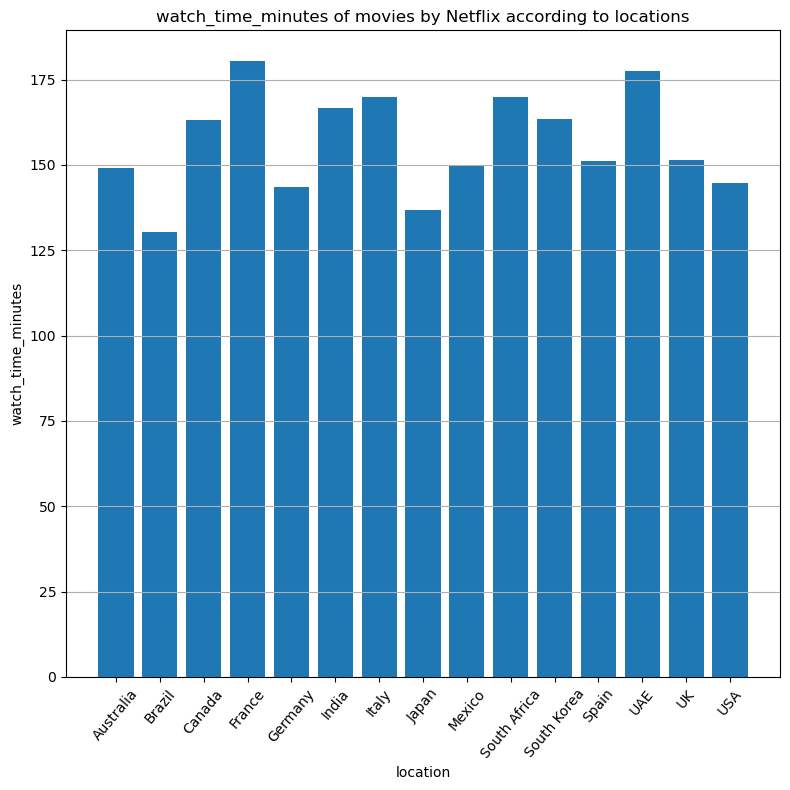

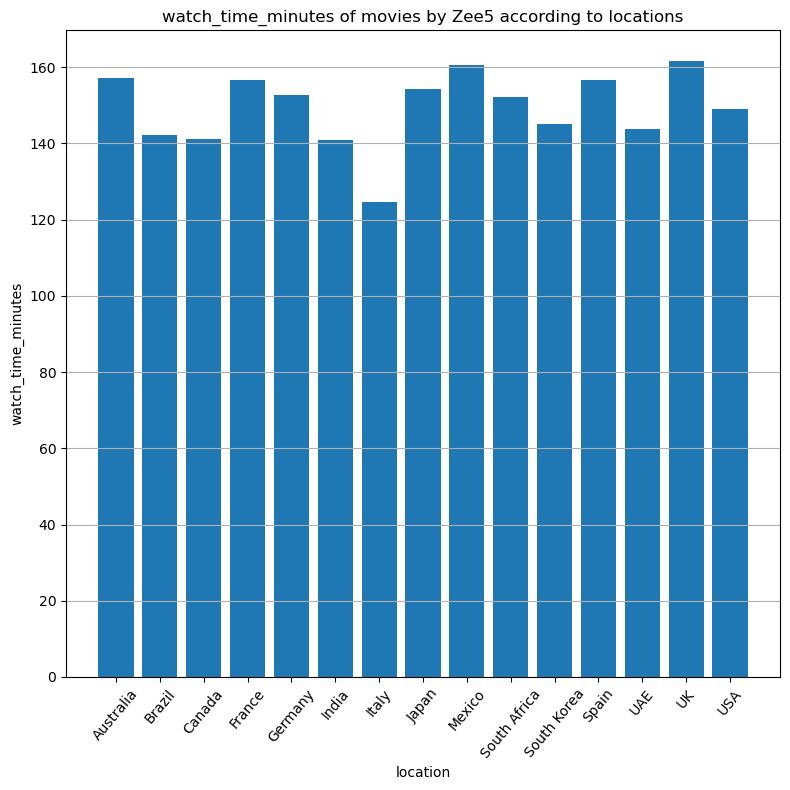

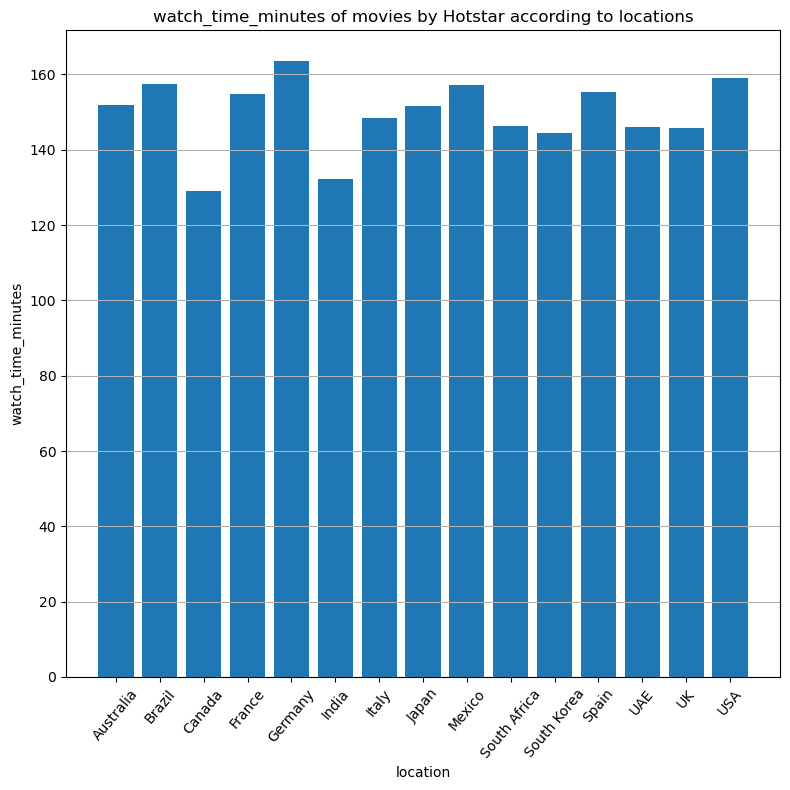

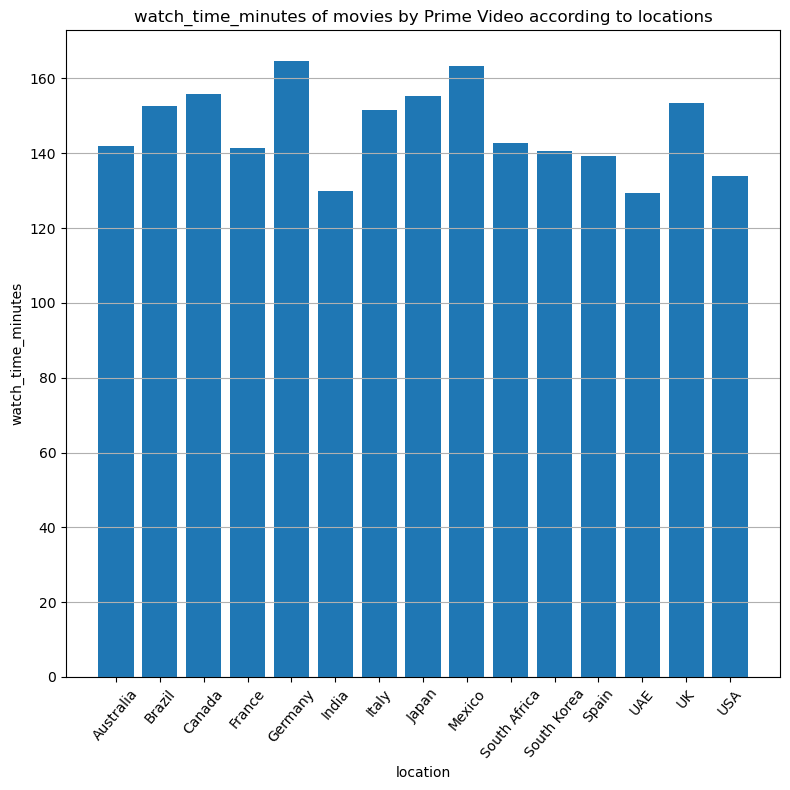

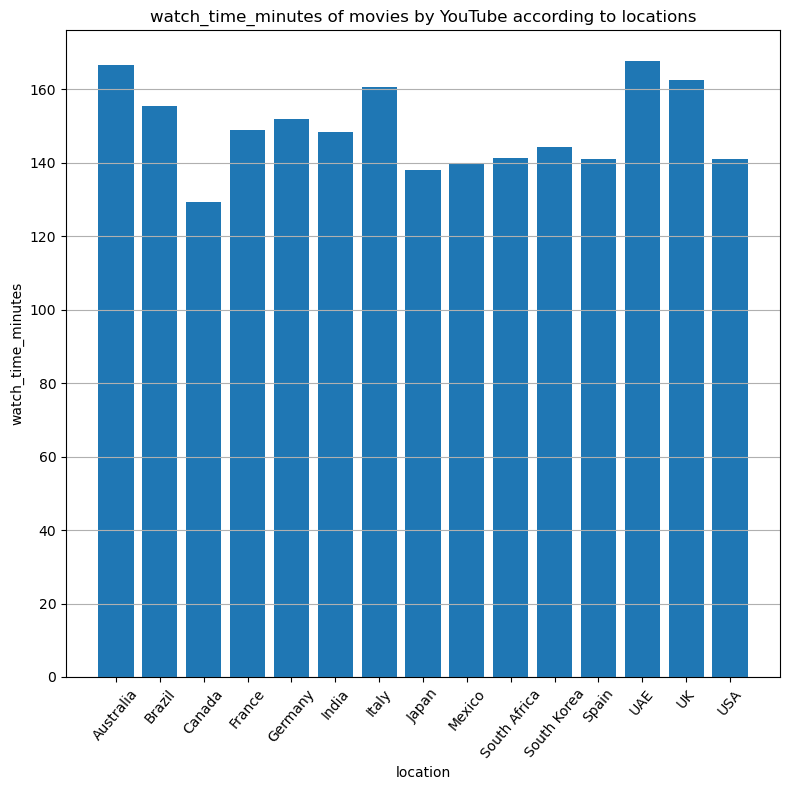

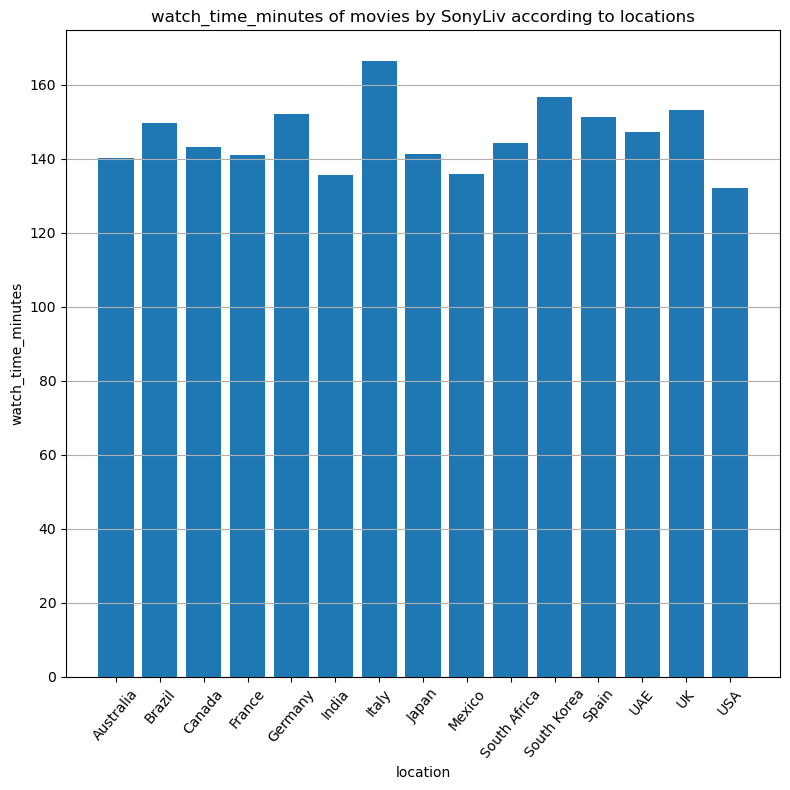

In [51]:
for platform in unique_platform:
    movies = df[df['platform'].str.contains(platform,na = False)]
    avg_popularity = movies.groupby('location')['watch_time_minutes'].mean()
    plt.figure(figsize = (8,8))
    plt.bar(avg_popularity.index, avg_popularity.values, label = platform)
    plt.title(f"watch_time_minutes of movies by {platform} according to locations")
    plt.xlabel("location")
    plt.ylabel("watch_time_minutes")
    plt.xticks(rotation = 50)
    plt.grid(axis = "y")
    plt.tight_layout()
    plt.show()

For each platform, there is a noticeable variation in average watch time across different locations. Some regions consistently log higher engagement, suggesting either a stronger platform presence or a local preference for streaming content. For example, if certain countries contribute more substantial watch times, this could reflect regional marketing efforts or content that resonates well with local viewers.

Comparing platforms, it is evident that location is a key factor in driving engagement. Some platforms show their peak user watch time in specific countries, indicating where their user base is most loyal or where content offerings align with local tastes. This kind of insight can guide platforms to further customize their content or outreach to enhance engagement in high-performing regions.

Furthermore, significant differences in watch time across locations on the same platform point toward opportunities for targeted growth. Underperforming regions may benefit from localized strategies or enhanced content curation, while successful regions can serve as benchmarks for expansion planning.

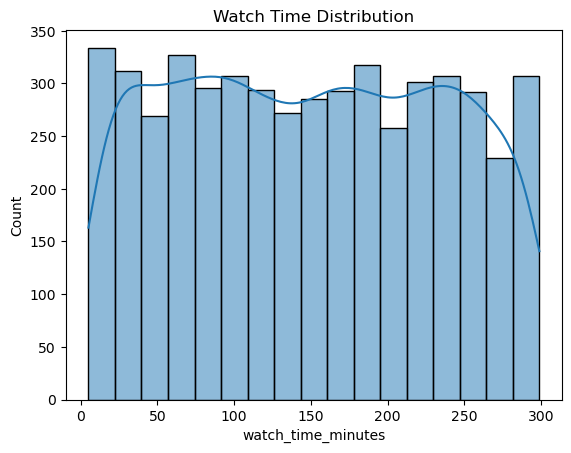

In [34]:
sns.histplot(df['watch_time_minutes'], kde=True)
plt.title("Watch Time Distribution")
plt.xlabel("watch_time_minutes")
plt.show()

This "Watch Time Distribution" histogram offers a fascinating and powerful insight into our user engagement. The most striking feature is the remarkably uniform distribution of watch times across the entire 0 to 300-minute spectrum. This flat shape is a clear indicator of incredibly broad and sustained engagement. It shows that users are just as likely to consume 50 minutes of content as they are 150 or 250 minutes, demonstrating that our platform is exceptionally "sticky" and successfully avoids the typical user drop-off seen in short-term viewing patterns.

This distribution is a testament to the versatility of our content library and its ability to cater to all viewing needs. The high counts at the very beginning of the chart show we are effectively capturing users looking for a quick session, while the equally high counts all the way to the 300-minute mark highlight a deeply committed audience settling in for long binge-watching sessions. This balance is a significant achievement, as it proves we have a robust catalog that serves every use case, retaining users effectively regardless of their intended session length.

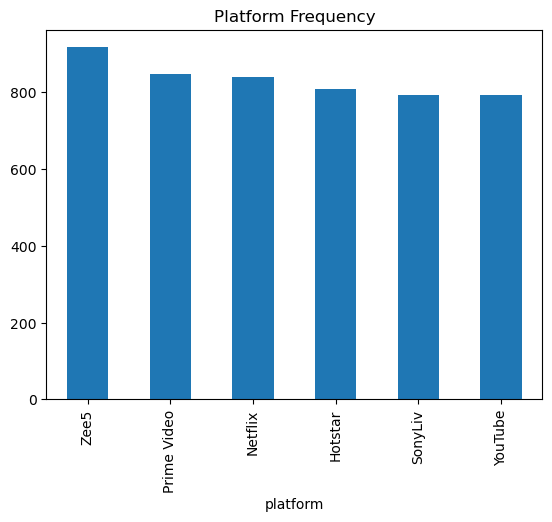

In [35]:
df['platform'].value_counts().plot(kind='bar')
plt.title("Platform Frequency")
plt.show()

This "Platform Frequency" chart provides a compelling overview of the streaming landscape, highlighting a key strategic strength: a remarkably balanced and well-distributed user engagement. The most significant finding is the exceptional consistency in frequency across all major platforms. While Zee5 shows a slight lead, it is part of a very tight grouping that includes Prime Video, Netflix, Hotstar, SonyLiv, and YouTube. All services demonstrate a strong and highly comparable presence, with no single platform overwhelmingly dominating the others.

This pattern strongly suggests that we are not operating in a "winner-take-all" market but rather a healthily competitive one. It indicates a highly diversified user base that is actively engaging across the entire streaming ecosystem. This is a testament to our broad market appeal and our successful strategy of maintaining a strong, competitive presence on every front. This balanced portfolio is a significant asset, as it ensures we have a wide reach and are not over-reliant on any single service, providing a stable foundation for growth across the board.

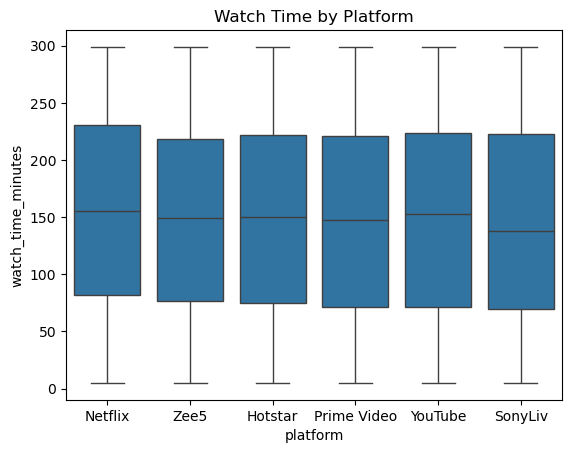

In [36]:
sns.boxplot(x='platform', y='watch_time_minutes', data=df)
plt.title("Watch Time by Platform")
plt.show()

This "Watch Time by Platform" boxplot provides a powerful and nuanced view of user engagement, revealing exceptional consistency and depth across the entire streaming ecosystem. The most prominent finding is that all major platforms—Netflix, Zee5, Hotstar, Prime Video, YouTube, and SonyLiv—demonstrate a remarkably similar and healthy engagement profile. The median watch time (the center line in each box) is consistently high for all services, hovering around the 150-minute mark. This indicates that a typical viewing session, regardless of platform, is substantial, proving that users are deeply engaged with the content on every service.

Furthermore, the interquartile range (the shaded box) for each platform is very broad, spanning from approximately 75 minutes to well over 225 minutes. This shows that the core 50% of users on every platform are investing significant time, not just logging in for brief views. The whiskers extending to the 0 and 300-minute marks reinforce this; they show that while quick check-ins do happen, an equally significant number of sessions are "super-engagements" that last for the full 300-minute period. This consistent, wide distribution across all competitors is a strong sign of a healthy, highly active market where every platform has successfully cultivated a deeply committed audience.

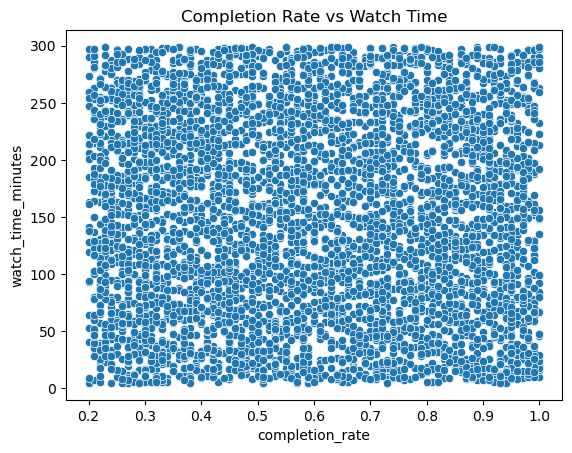

In [38]:
sns.scatterplot(x='completion_rate', y='watch_time_minutes', data=df)
plt.title("Completion Rate vs Watch Time")
plt.show()

This "Completion Rate vs Watch Time" scatter plot provides a fascinating and incredibly positive insight into the diversity of our audience's viewing habits. The most prominent feature is the complete lack of correlation, with data points distributed evenly across the entire canvas. This demonstrates that our platform is not a one-size-fits-all experience but a rich ecosystem that successfully serves all viewing patterns simultaneously. We have users who watch for short periods and complete their content (low watch time, high completion), as well as users who binge for 300 minutes straight.

This broad distribution is a clear sign of a healthy, multifaceted platform. It shows that engagement isn't tied to a single behavior; we are just as successful at serving a user who wants to watch a 2-hour movie and finish it (e.g., a point at 120 minutes and 1.0 completion) as we are at serving a user who "grazes" on 5 hours of different content (e.g., a point at 300 minutes and 0.3 completion). This diversity is our strength, proving our catalog is robust enough to satisfy any viewing intent, from "snackable" short-form to long-form "binge-watching," which maximizes our total addressable audience.

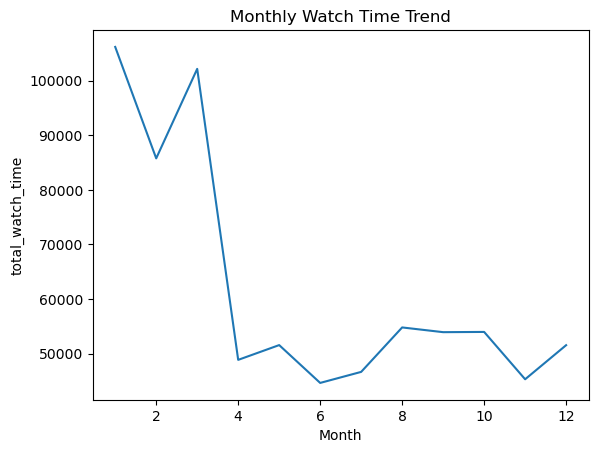

In [39]:
df['date'] = pd.to_datetime(df['date'])
# Watch time by month
df.groupby(df['date'].dt.month)['watch_time_minutes'].sum().plot(kind='line')
plt.title("Monthly Watch Time Trend")
plt.xlabel("Month")
plt.ylabel("total_watch_time")
plt.show()

This "Monthly Watch Time Trend" chart provides a clear narrative of our platform's engagement cycle over the year. We launched with an exceptionally strong start, with total watch time peaking at over 100,000 in months 1 and 3. This indicates a highly successful launch period or a major content drop that captured significant audience interest, driving initial adoption and high engagement right out of the gate.

Following this powerful peak, the trend shows a sharp normalization, settling into a new, stable baseline around the 50,000-watch_time mark for the remainder of the year. This pattern is indicative of a maturing platform; after the initial blockbuster event, we've retained a solid, sustainable core of user engagement. This second half of the year, with its consistent performance, demonstrates a stable and predictable user base, which is a fantastic foundation for future growth.

This chart also highlights key seasonal opportunities. We see minor troughs around month 6 (June) and month 11 (November), which are likely tied to seasonal behavior like holidays or summer travel. These predictable lulls are not signs of weakness but are instead clear strategic windows. They show us exactly when to schedule our next big content push or marketing campaign to re-engage users and create another significant peak, turning these seasonal dips into our next big growth catalysts.

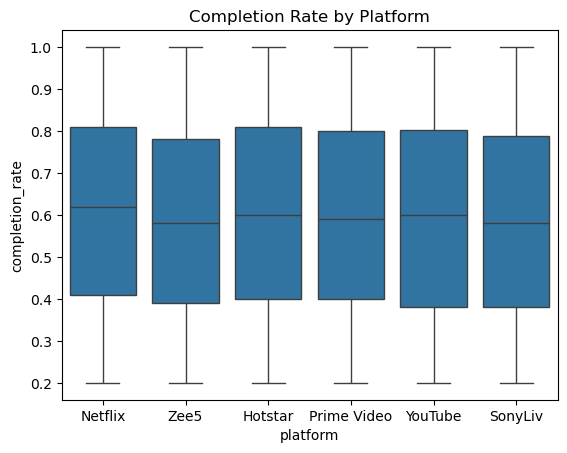

In [40]:
sns.boxplot(x='platform', y='completion_rate', data=df)
plt.title("Completion Rate by Platform")
plt.show()

This "Completion Rate by Platform" boxplot provides a powerful and encouraging view of content stickiness, revealing a universally high standard of engagement across the entire streaming industry. The most significant insight is the remarkable consistency in user behavior across all major platforms. Every service, from Netflix and Hotstar to YouTube and SonyLiv, shows a nearly identical, strong completion rate profile. This indicates that we are operating in a mature, high-quality market where users are deeply engaged with content, regardless of the platform they choose.

Drilling into the details, the median completion rate (the center line) for every platform is exceptionally high, settling around the 60% mark. This is a fantastic sign, as it shows that a typical user, on any service, finishes the majority of the content they begin. Furthermore, the core 50% of users (the "box") on all platforms are consistently completing between 40% and 80% of their content. This isn't a niche behavior; it's a mainstream pattern of deep engagement, proving the high quality of content catalogs and recommendation engines across the board.

The key strategic takeaway is that our platform is performing at the same high standard as our top competitors, successfully capturing and retaining user attention. The whisker extending to the 1.0 (100%) mark for all services, including ours, confirms that we are all highly effective at creating "superfans" who finish their content. This validates our content strategy and solidifies our position as a best-in-class service for user satisfaction and content-fit.

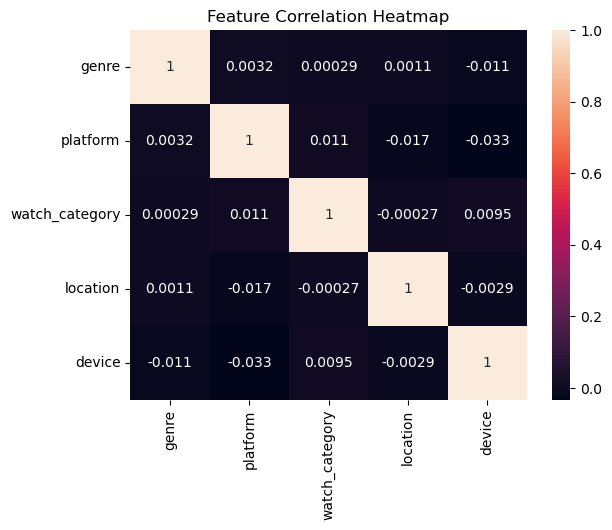

In [42]:
corr = df_encoded.corr()
sns.heatmap(corr, annot=True)
plt.title("Feature Correlation Heatmap")
plt.show()

This Feature Correlation Heatmap provides a powerful strategic insight: our key categorical features are all independent, which points to a highly flexible and universally appealing platform. The most significant finding is that all correlation values are exceptionally close to zero. This lack of correlation is a sign of strength, demonstrating that user choice in one area does not restrict their behavior in another. For example, the near-zero correlation between genre and platform indicates that all platforms offer a rich, diverse catalog, and no single service "owns" a specific content type.

This independence is most evident in the relationship between device, genre, and watch_category. The non-existent correlation shows that users are not limiting their content choices based on their screen. They are just as willing to engage with any genre or watch_category on a Mobile device as they are on a Smart TV. This is a fantastic testament to our user experience, proving we've successfully eliminated friction and are delivering all content types effectively to all screens.

Furthermore, the lack of correlation between location and other features like genre confirms the universal, global appeal of our content library. Tastes are not siloed by region, which simplifies our content strategy and reinforces that a high-quality title can succeed in all markets. In summary, this chart shows we've built a robust ecosystem where users have the complete freedom to watch what they want, where they want, on any device they want.